In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import warnings
warnings.filterwarnings('ignore')
import resource
soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

#import __future__
import numpy as np
import sys
import glob
from root_numpy import root2array, tree2array
from root_numpy import testdata
import ROOT
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.colors as colors
from scipy.interpolate import interp1d
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


Welcome to JupyROOT 6.14/00


In [2]:

paths = glob.glob("/data/ANTARES/pseudo_experiments/prueba/pex*")

<IPython.core.display.Javascript object>


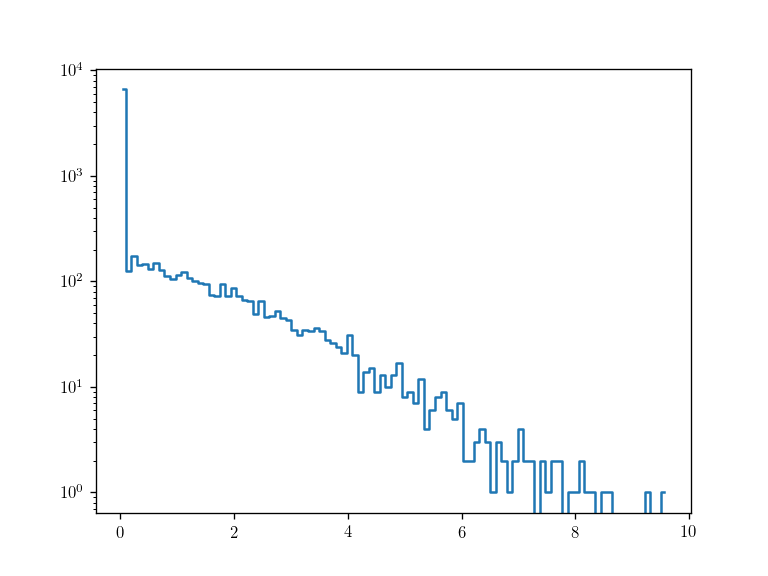

In [16]:
fig, ax = plt.subplots()
bin_num=100
ax.set_yscale('log')
data = ROOT.TFile("/data/ANTARES/pseudo_experiments/prueba/pex_n0_b100_l540_ch0_mass11.root")
d =data.Get('Ctree')
data_array= tree2array(d)
median = np.mean(data_array["Z2"])# I know the mean is not the median
bins = np.linspace(data_array["Z2"].min(), data_array["Z2"].max(),bin_num)
hist, bins = np.histogram(data_array["Z2"],bins=bins)
bins_cen = (bins[1:] + bins[:-1])/2.
ax.step(bins_cen, hist,where='mid')

In [92]:
paths

['/data/ANTARES/pseudo_experiments/prueba/pex_n3_b100_l540_ch0_mass3.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n10_b100_l540_ch0_mass3.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n1_b100_l540_ch0_mass3.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n40_b100_l540_ch0_mass15.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n9_b100_l540_ch0_mass11.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n19_b100_l540_ch0_mass11.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n38_b100_l540_ch0_mass15.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n20_b100_l540_ch0_mass15.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n28_b100_l540_ch0_mass3.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n39_b100_l540_ch0_mass3.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n26_b100_l540_ch0_mass3.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n3_b100_l540_ch0_mass15.root',
 '/data/ANTARES/pseudo_experiments/prueba/pex_n18_b100_l540_ch0_mass3.root

<IPython.core.display.Javascript object>


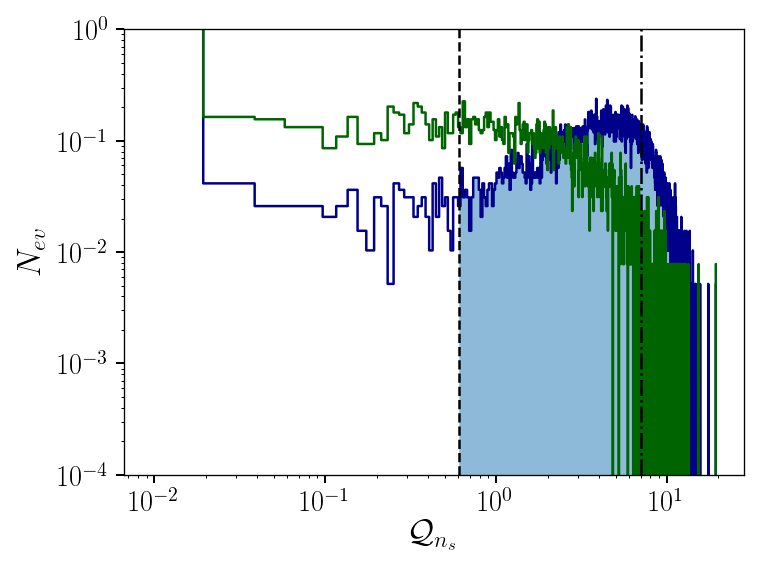

In [106]:

mass='15'
pval = np.array([])
ns = np.array([])
for pa in paths:
    name=pa.split('/')[-1]
    number = int(name.split('_')[1][1:])
    n = name.split('_')[5]
    index = n.find('.')
    m = int(name.split('_')[5][4:index])
    if number>20:
        continue
    if number%3!=0:
        continue
    if m!=int(mass):
        continue
    data = ROOT.TFile(pa)
    d =data.Get('Ctree')
    data_array= tree2array(d)
    bins = np.linspace(data_array["Z2"].min(), data_array["Z2"].max(),bin_num)
    p = len(data_array["Z2"][data_array["Z2"]>median])/float(len(data_array["Z2"]))
    pval = np.append(pval, p)
    ns =np.append(ns, number)
index = np.where(np.abs(pval - 0.9)==np.abs(pval - 0.9).min())
nexpected = str(int(ns[index]))

fig, ax = plt.subplots()
bin_num=1000
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim([1e-4,1])
#ax.set_xlim([0,17.5])

data = ROOT.TFile("/data/ANTARES/pseudo_experiments/prueba/pex_n0_b100_l540_ch0_mass"+mass+".root")
d =data.Get('Ctree')
data_array= tree2array(d)


median = np.mean(data_array["Z2"])# I know the mean is not the median
sor_ind = np.argsort(data_array["Z2"])
sorte = data_array["Z2"][sor_ind]
sig_3 = sorte[int(len(sorte)*0.9973)]



bins = np.linspace(data_array["Z2"].min(), data_array["Z2"].max(),bin_num)
hist, bins = np.histogram(data_array["Z2"],bins=bins, normed=1)



data1 =  ROOT.TFile("/data/ANTARES/pseudo_experiments/prueba/pex_n6_b100_l540_ch0_mass"+mass+".root")
d1 =data1.Get('Ctree')
data_array1= tree2array(d1)



bins1 = np.linspace(data_array1["Z2"].min(), data_array1["Z2"].max(),bin_num)
hist1, bins = np.histogram(data_array1["Z2"],bins=bins1, normed=1)

bins_cen = (bins[1:] + bins[:-1])/2.
bins_cen1 = (bins1[1:] + bins1[:-1])/2.

ax.step(bins_cen1, hist1,where='mid',c='darkblue')
ax.fill_between(bins_cen1[bins_cen1>median],np.zeros(len(hist1[bins_cen1>median])), 
                hist1[bins_cen1>median],step='mid',alpha=0.5)
ax.step(bins_cen, hist,where='mid',c='darkgreen')
ax.axvline(x=median+(bins[1]/2.), ls='--', c='k')
ax.axvline(x=sig_3, ls='-.', c='k')
#ax.text(np.median(data_array1["Z2"]))
ax.set_xlabel(r"$ \mathcal{Q}_{n_s}$",fontsize=20)
ax.set_ylabel(r"$\ N_{ev}$",fontsize=20)
#legend = ax.legend(loc='lower right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)
plt.tight_layout()

In [91]:
sor_ind = np.argsort(data_array["Z2"])
sorte = data_array["Z2"][sor_ind]
sorte[int(len(sorte)*0.9973)]

7.027957041310238

In [123]:
fig, ax = plt.subplots()
bin_num=500
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim([1e-4,1])
#ax.set_xlim([0,17.5])

data = ROOT.TFile("/data/ANTARES/pseudo_experiments/prueba/pex_n0_b100_l540_ch0_mass"+mass+".root")
d =data.Get('Ctree')
data_array= tree2array(d)
data_array["Z2"] += 1e-6





bins = np.logspace(-6, np.log10(data_array["Z2"].max()),bin_num)
hist, bins = np.histogram(data_array["Z2"],bins=bins, normed=1)
bins_cen = (bins[1:] + bins[:-1])/2.



data1 =  ROOT.TFile("/data/ANTARES/pseudo_experiments/prueba/pex_n6_b100_l540_ch0_mass"+mass+".root")
d1 =data1.Get('Ctree')
data_array1= tree2array(d1)
data_array1["Z2"]+=1e-6


bins1 = np.logspace(np.log10(np.data_array1["Z2"].min()), np.log10(data_array1["Z2"].max()),bin_num)
hist1, bins = np.histogram(data_array1["Z2"],bins=bins1, normed=1)


bins_cen1 = (bins1[1:] + bins1[:-1])/2.




ax.step(bins_cen, hist,where='mid',c='darkgreen')
ax.step(bins_cen1, hist1,where='mid',c='blue')

<IPython.core.display.Javascript object>

AttributeError: 'module' object has no attribute 'data_array1'